In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import pandas as pd
import numpy as np
import matplotlib
import threading
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano
import transgeneQC

In [2]:
workingDirectory = '/home/h1bennet/strains/results/02_Strains_CCl4_6weeks_RNA/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


# Assess mapping statistics
For this pipeline I use a custom script to pull statistics from the tagInfo.txt file in homer tagDirectories and from the bowtie/star log file, if the bowtie/star log file is not present in the tag directory then some fields in the rna_qc dataframe will not be filled.

In [3]:
rna_qc = ngs_qc('/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/')

/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer//
./CCl4_6week_kupffer_qc/


<Figure size 432x288 with 0 Axes>

In [4]:
rna_qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
00_aj_KNRM_RNA_CCl4_6weeks_AJ12A_161212,7618059.0,75.0,0.007811,2.791,0.500,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0000
00_aj_KNRM_RNA_CCl4_6weeks_AJ12B_161212,9659706.0,75.0,0.009299,2.620,0.489,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0000
01_balbc_KNRM_RNA_CCl4_6weeks_Balb12A_161212,2999444.0,75.0,0.007128,6.467,0.507,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0000
01_balbc_KNRM_RNA_CCl4_6weeks_Balb13A_161216,5517388.0,75.0,0.008084,3.987,0.507,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0000
01_balbc_KNRM_RNA_CCl4_6weeks_Balb13B_161216,5389325.0,75.0,0.006510,3.287,0.484,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0000
01_balbc_Kupffer_RNA_CCl4_6weeks_Balb13B_161216,5105906.0,75.0,0.006659,3.549,0.519,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0000
02_C57BL6J_M_KNRM_RNA_CCl4_6weeks_NSL112_l20171006,6462195.0,75.0,0.005717,2.408,0.489,17040721.0,15558180.0,1228378.0,0.0,0.0075,0.0029,0.913000,0.9896
02_C57BL6J_M_Kupffer_RNA_CCl4_6weeks_NSL105_l20171006,6311284.0,75.0,0.006915,2.981,0.496,20664420.0,18816544.0,1483594.0,0.0,0.0100,0.0027,0.910577,0.9873
02_C57BL6J_M_Kupffer_RNA_CCl4_6weeks_NSL112_l20171006,7096286.0,75.0,0.006647,2.549,0.490,19722897.0,18088208.0,1304191.0,0.0,0.0081,0.0032,0.917117,0.9887
02_NCoRWT_KNRM_RNA_CCl4_6week_LN156dM_JSS_160606,6097075.0,75.0,0.008521,3.803,0.491,26347275.0,23189295.0,2348092.0,0.0,0.0170,0.0052,0.880140,0.9778


# Aggregate read counts across transcriptome
For this analysis we make a few different files. For unbiased clustering I use condensed RPKM reads, but for differential gene expression i use condensed raw reads. However when homer does 'condenseGenes' it picks the isoform with the highest read value as assessed by 'raw', 'rpkm', or 'tpm', and in some cases these differ. So when plotting things downstream of DESeq2 I use the uncondensed TPM file and match it to the exact refseq isoform specified in the raw condense file

In [6]:
%%bash
# if directories don't exist, create them
if [ ! -d ./expression/ ]; then mkdir ./expression; fi

analyzeRepeats.pl rna mm10 -count exons -condenseGenes -raw -d /home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/* > ./expression/rna_exp_raw.tsv
analyzeRepeats.pl rna mm10 -count exons -rpkm -d /home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/* > ./expression/rna_exp_rpkm.tsv
analyzeRepeats.pl rna mm10 -count exons -condenseGenes -rpkm -d /home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/* > ./expression/rna_exp_rpkm_condensed.tsv
analyzeRepeats.pl rna mm10 -count exons -tpm -d /home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/* > ./expression/rna_exp_tpm.tsv
analyzeRepeats.pl rna mm10 -count exons -condenseGenes -tpm -d /home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/* > ./expression/rna_exp_tpm_condensed.tsv


	Tag Directories:
		/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/00_aj_KNRM_RNA_CCl4_6weeks_AJ12A_161212
		/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/00_aj_KNRM_RNA_CCl4_6weeks_AJ12B_161212
		/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/01_balbc_KNRM_RNA_CCl4_6weeks_Balb12A_161212
		/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/01_balbc_KNRM_RNA_CCl4_6weeks_Balb13A_161216
		/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/01_balbc_KNRM_RNA_CCl4_6weeks_Balb13B_161216
		/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/01_balbc_Kupffer_RNA_CCl4_6weeks_Balb13B_161216
		/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/02_C57BL6J_M_KNRM_RNA_CCl4_6weeks_NSL112_l20171006
		/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/02_C57BL6J_M_Kupffer_RNA_CCl4_6weeks_NSL105_l20171006
		/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/02_C57BL6J_M_Kupffer_RNA_CCl4_6weeks_NSL112_l20171006
		/home/h1bennet/strains/data/RNA/CCl4_6week_kupffer/02_NCoRWT_KNRM_RNA_CCl4_6week_

### Summary plots (PCA, heatmap)

In [7]:
# read in rpkm
rpkm = pd.read_csv('./expression/rna_exp_rpkm_condensed.tsv', sep='\t')
rpkm.set_index(rpkm.columns.values[0], inplace=True)
rpkm.index.rename('refseqID', inplace=True)
# set rpkm index
mm10_gene = rpkm['Annotation/Divergence'].str.split('|').str[0]

# clean up column names
# rename rpkm columns
rpkm = rpkm.rename(columns=dict(zip(rpkm.iloc[:, 7:].columns.values,
                                    pd.Series(rpkm.iloc[:, 7:].columns.values).str[:-5].str.split('/').str[-1])))
# change index to gene names
rpkm['gene'] = mm10_gene
rpkm = rpkm.reset_index().set_index('gene').drop(labels='refseqID', axis=1)

# drop samples that don't have enough reads
rpkm = rpkm.loc[:, ~rpkm.columns.str.contains('xxx')]

# filter genes with length < 250 bp
rpkm = rpkm.loc[rpkm.Length >= 250, :]

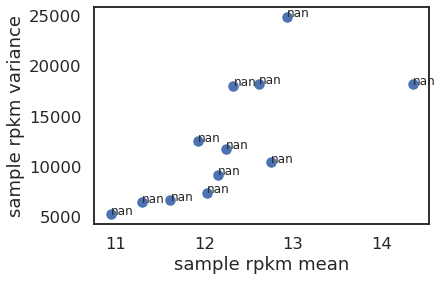

In [9]:
ax = plt.scatter(rpkm.iloc[:, 7:].mean(), rpkm.iloc[:, 6:].var())
plt.xlabel('sample rpkm mean')
plt.ylabel('sample rpkm variance')
label_point(rpkm.iloc[:, 7:].mean(),
            rpkm.iloc[:, 7:].var(),
            pd.Series(rpkm.iloc[:, 7:].columns.values, index=rpkm.iloc[:, 7:].columns.values).str.split('_').str[9],
            plt.gca())

### PCA plot

In [12]:
if not os.path.isdir('./figures'):
    os.mkdir('./figures')

In [27]:
# filter lowly expressed genes
rpkm_filt = rpkm.loc[(rpkm.iloc[:, 7:] > 4).all(1),
                     rpkm.columns.str.contains('RNA')]

samples = pd.Series(rpkm_filt.columns.values)
cage = samples.str.split('_').str[8]
time = samples.str.split('_').str[7]
group = samples.str.split('_').str[2]
celltype = samples.str.split('_').str[4]
gender = samples.str.split('_').str[3]

samplesDF = pd.DataFrame([pd.Series(samples),
                          pd.Series(cage),
                          pd.Series(gender),
                          pd.Series(time),
                          pd.Series(group),
                          pd.Series(celltype)],
                         index=['mouse', 'cage', 'gender', 'time', 'group', 'celltype']).T

# quantile normalize
rpkm_filt_quant = quantile_normalize_df(rpkm_filt.iloc[:, :])

In [28]:
samplesDF.mouse[0]

'00_mouse_CreNeg_M_WholeLiver_RNA_AMLNDiet_20weeks_LLXR163A_HBENN_l20200909_ATATGGAT_CTGTATTA'

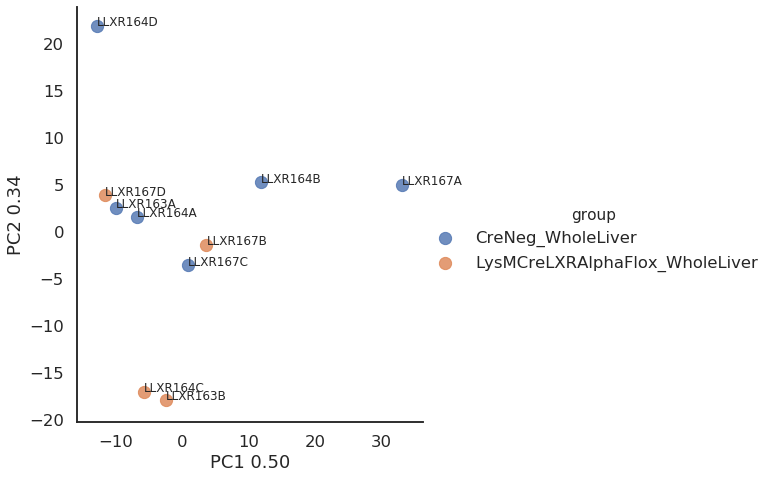

In [29]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=rpkm_filt,
                                 group_labels=samplesDF.group+'_'+samplesDF.celltype,
                                 plot_size=7,
                                 n_pca=3)
label_point(pca.PC1,
            pca.PC2,
            samplesDF.cage,
            plt.gca())
plt.savefig('./figures/rna_pca_filt_gender.pdf')

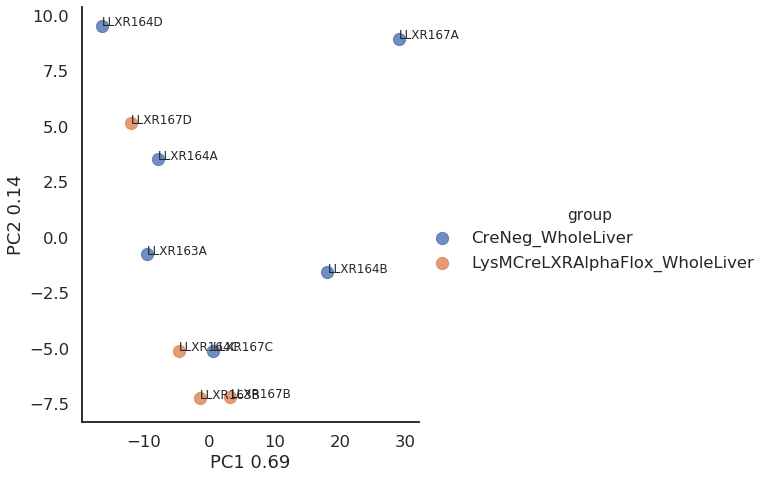

In [30]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=rpkm_filt_quant,
                                 group_labels=group+'_'+samplesDF.celltype,
                                 plot_size=7,
                                 n_pca=3)
label_point(pca.PC1,
            pca.PC2,
            samplesDF.cage,
            plt.gca())
plt.savefig('./figures/rna_pca_filt_quant.pdf')

### Repeat clustering while filtering female samples

In [31]:
samp_filt =['LLXR167A']
rpkm_filt_samp = rpkm_filt.loc[:, ~rpkm_filt.columns.str.contains('|'.join(samp_filt))]
rpkm_filt_quant_samp = rpkm_filt_quant.loc[:, ~rpkm_filt_quant.columns.str.contains('|'.join(samp_filt))]
samplesDF_samp = samplesDF.loc[~samplesDF.mouse.str.contains('|'.join(samp_filt)), :]

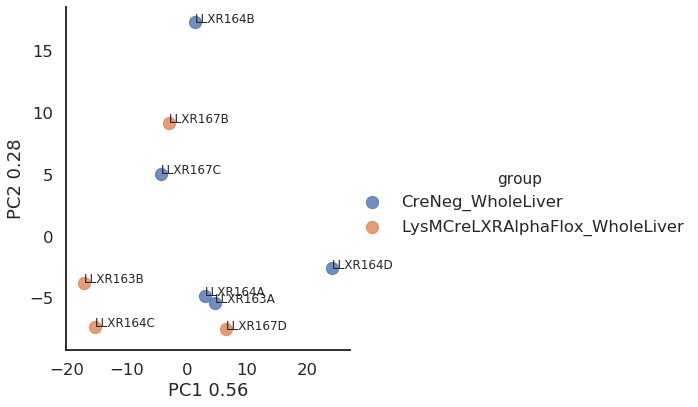

In [32]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=rpkm_filt_samp,
                                 group_labels=samplesDF_samp.group+'_'+samplesDF_samp.celltype,
                                 plot_size=6,
                                 n_pca=3)
label_point(pca.PC1,
            pca.PC2,
            samplesDF_samp.cage,
            plt.gca())
plt.savefig('./figures/rna_pca_filt_samples_filt.pdf')

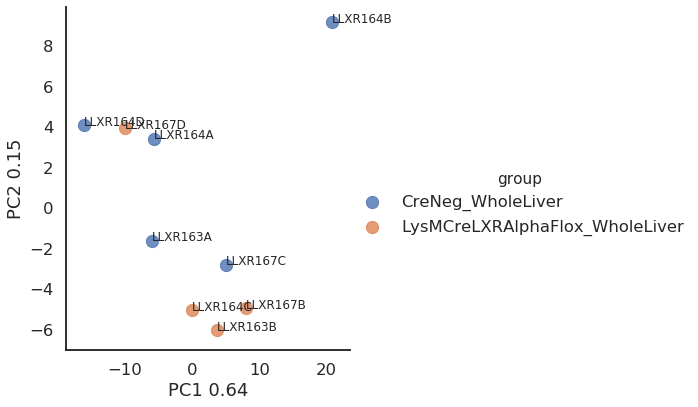

In [33]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=rpkm_filt_quant_samp,
                                 group_labels=samplesDF_samp.group+'_'+samplesDF_samp.celltype,
                                 plot_size=6,
                                 n_pca=3)
label_point(pca.PC1,
            pca.PC2,
            samplesDF_samp.cage,
            plt.gca())
plt.savefig('./figures/rna_pca_filt_samples_filt_quant.pdf')

# pearson correlation

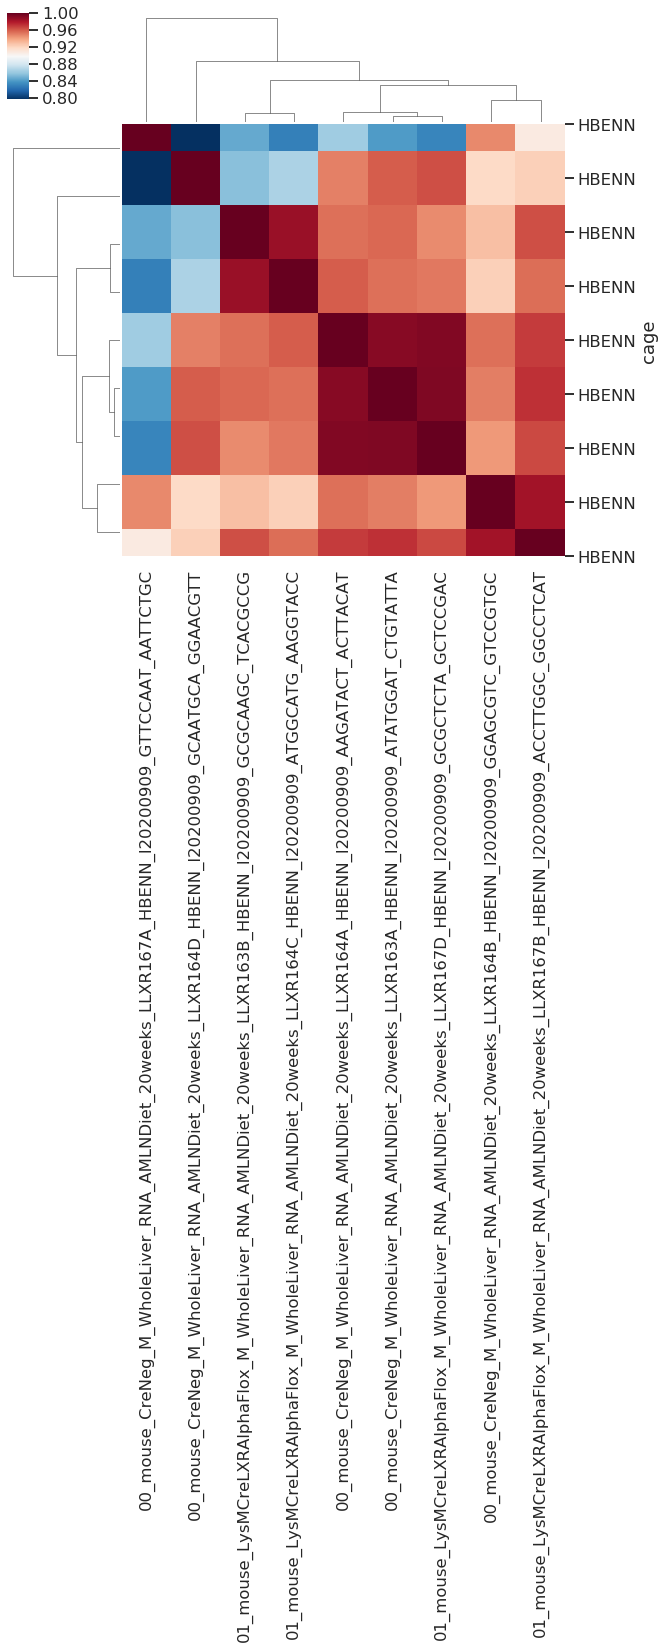

In [20]:
rpkm_corr = rpkm_filt_samp.corr()
rpkm_corr.index = samplesDF_samp.cage
cm = sns.clustermap(rpkm_corr, cmap='RdBu_r')
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);
